# Machine Learing - System Threat Forecaster 

### Train.csv Exploration
#### Dataset has horizontal of 75 features i.e. Product name, Engine Version, Is beat user, Hastpm, ReagionId, OsBuildername, Autosamplesubmission enable, Diskcapacity, OSArchitecture,... and a target. and vertical of 1,00,000 rows. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#Load Train set
df_train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
print("train.csv loaded")

train.csv loaded


## Data Exploration Analysis

##### Shape
##### Missing Values
##### Correlation Matrix
##### Visualization 

In [2]:
# Coulumn wise number of NA
# Duplicate rows 
# datatype seperation 

# print(df_train.head())

print("\nShape", df_train.shape)

# Target Distribution
target_counts = df_train['target'].value_counts()
print("\nTarget variable value counts:\n", target_counts)

# df_train.isnull().sum()

# duplicate_rows = df_train[df_train.duplicated()]
# len(duplicate_rows)
# print("\nduplicate rows:", len(duplicate_rows))

# df_train.info()

# #Numerical data types features, include binary - Details 
# numerical_features = df_train.select_dtypes(include=np.number)
# print("\nDescriptive statistics for numerical features:\n", numerical_features.describe())

#Features with high missing Values 
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
top_10_missing = missing_percentage.sort_values(ascending=False).head(10)
print("\n Top Missing values \n",top_10_missing )

duplicate_rows = df_train[df_train.duplicated()]
len(duplicate_rows)
print("\nduplicate rows:", len(duplicate_rows))


Shape (100000, 76)

Target variable value counts:
 target
1    50525
0    49475
Name: count, dtype: int64

 Top Missing values 
 SMode                             0.981
CityID                            0.623
RegionIdentifier                  0.559
IsGamer                           0.559
InternalBatteryNumberOfCharges    0.515
FirmwareManufacturerID            0.376
FirmwareVersionID                 0.334
IsFlightsDisabled                 0.326
OEMModelID                        0.228
OEMNameID                         0.212
dtype: float64

duplicate rows: 165


#### Numerical Features Visualization 


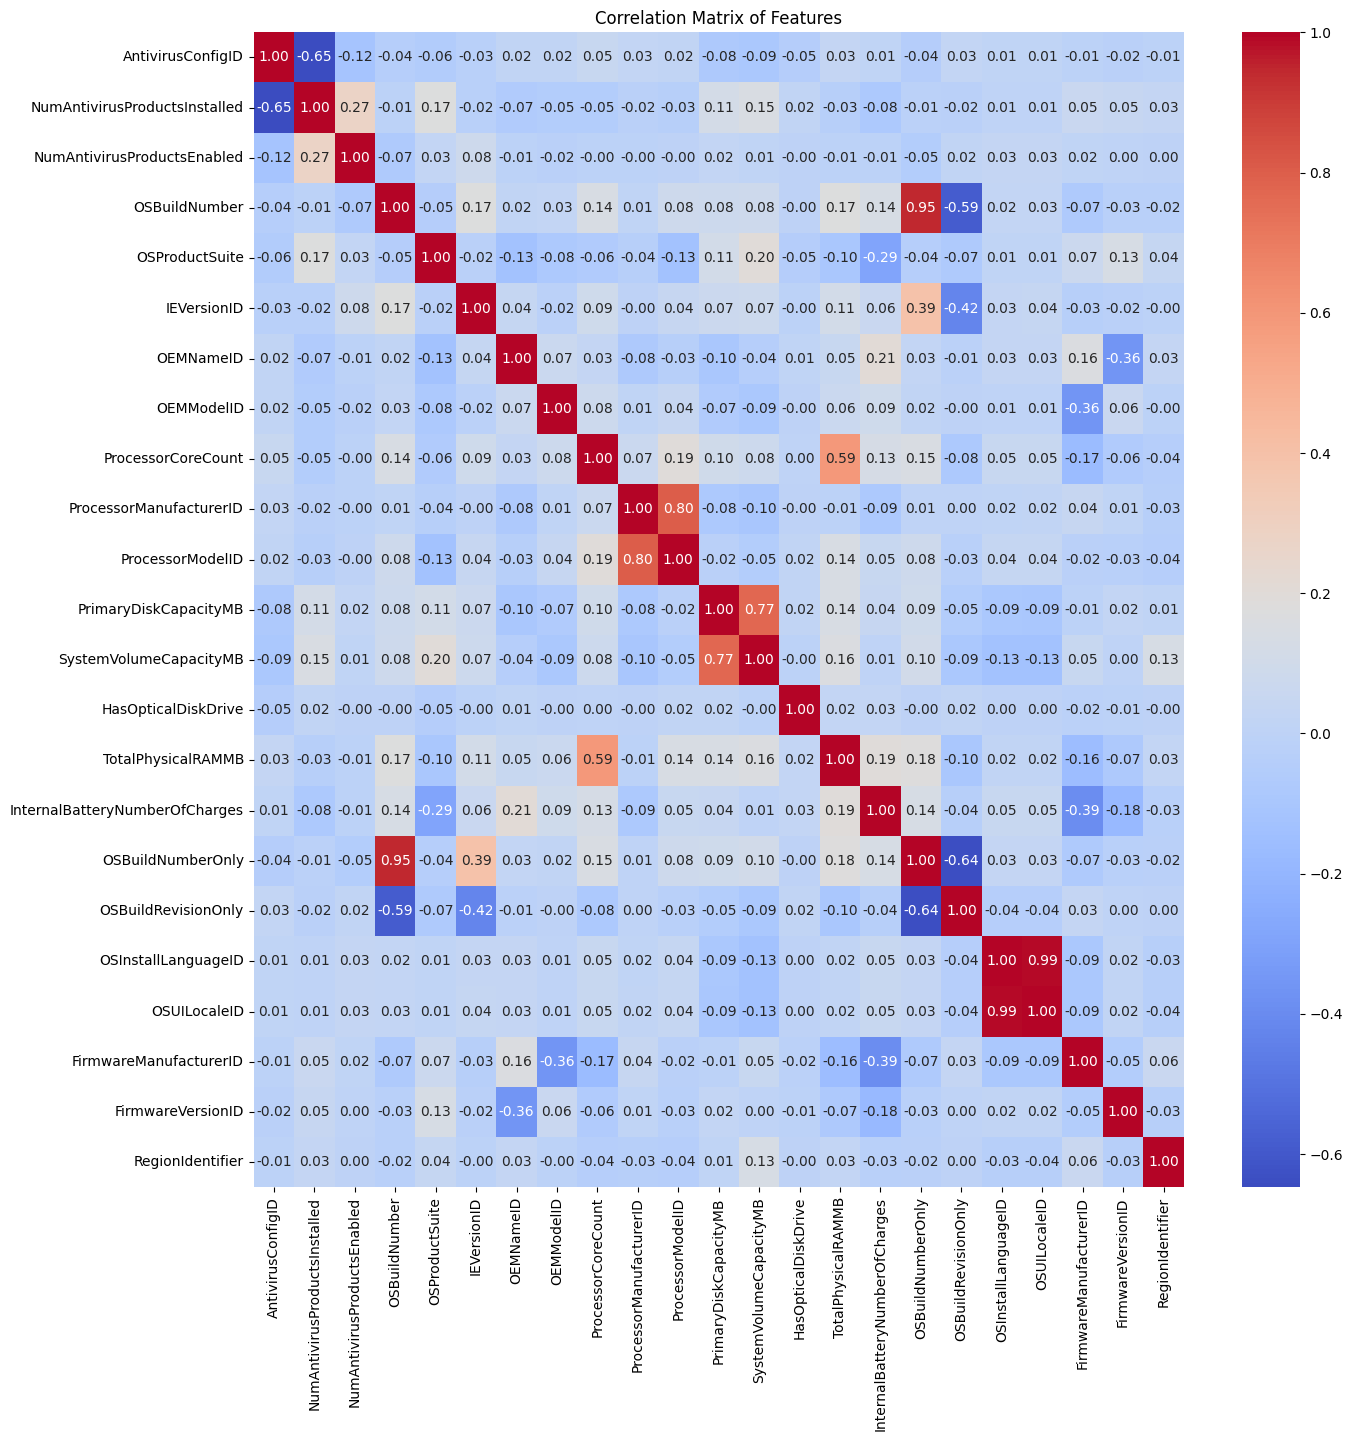


Descriptive Statistics for Numerical Features
        AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000                       1.000000   
75%         53447.000000                       2.000000   
max         70490.000000                       5.000000   

       NumAntivirusProductsEnabled  OSBuildNumber  OSProductSuite  \
count                 99924.000000  100000.000000   100000.000000   
mean                      1.018264   15917.208720      578.403380   
std                       0.155291    1943.421132      247.240971   
min                       0.000000    7601.000000       16.000000   
25%                       1.000000   16299.000000      256.000000   
50%   

In [3]:
# Numerical Features Correlation Matrix
num_features_co = ['AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled','OSBuildNumber', 'OSProductSuite','IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'FirmwareManufacturerID', 'FirmwareVersionID', 'RegionIdentifier']
num_correlation_matrix = df_train[num_features_co].corr()

# heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(num_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# print(correlation_matrix)

#Descriptive Stats
descriptive_stats = df_train[num_features_co].describe()
print("\nDescriptive Statistics for Numerical Features\n", descriptive_stats)


#### Categorical Features Visualization

RegionIdentifier with Indicated Colors (for target = 1):
- 10.0: 10663 (Color: lightblue)
- 11.0: 7882 (Color: lightcoral)
- 1.0: 7600 (Color: lightgreen)
- 3.0: 7584 (Color: lightyellow)
- 15.0: 5708 (Color: lightpink)
- 7.0: 3443 (Color: orange)
- 8.0: 1637 (Color: cyan)
- 13.0: 1162 (Color: magenta)
- 5.0: 1134 (Color: olive)
- 6.0: 889 (Color: teal)
- 12.0: 883 (Color: lightblue)
- 4.0: 779 (Color: lightcoral)
- 2.0: 437 (Color: lightgreen)
- 9.0: 418 (Color: lightyellow)
- 14.0: 20 (Color: lightpink)


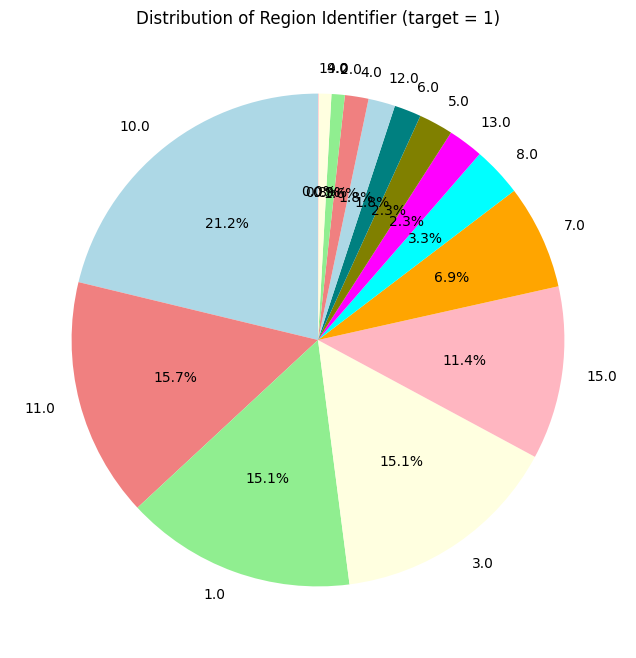

Unique values of licenceActivationChannel (target = 1):
 LicenseActivationChannel
Retail            25787
OEM:DM            19749
Volume:GVLK        2831
OEM:NONSLP         2113
Volume:MAK           44
Retail:TB:Eval        1
Name: count, dtype: int64


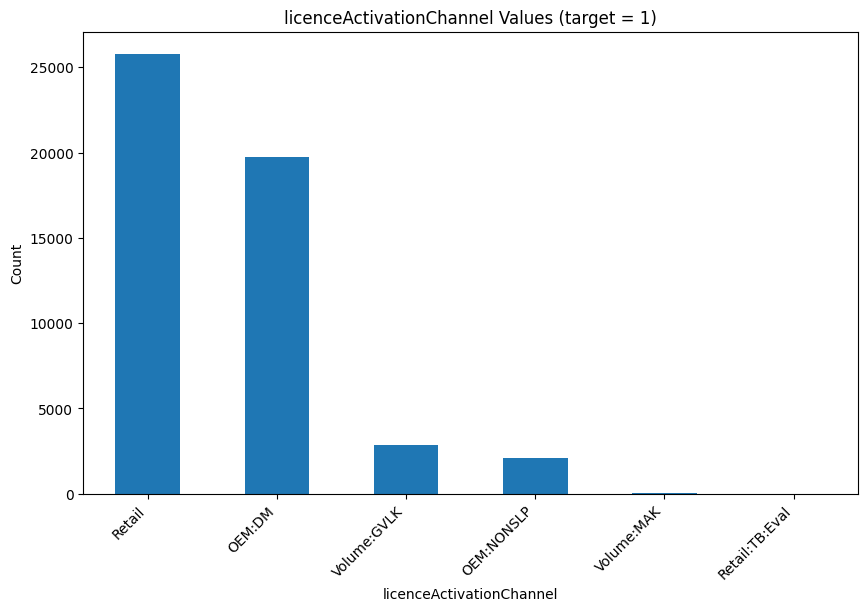

In [4]:
# #Categorical features unique values count
# for column in df_train.select_dtypes(include='object').columns:
#   print(f"\nUnique values for {column}: {df_train[column].unique()}")
#   print(f"Value counts for {column}:\n{df_train[column].value_counts()}")


# Categorical Variable RegionIdentifer top class when target = 1
df_target_1 = df_train[df_train['target'] == 1]

region_identifier_counts = df_target_1['RegionIdentifier'].value_counts()
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink', 'orange', 'cyan', 'magenta', 'olive', 'teal']

print("RegionIdentifier with Indicated Colors (for target = 1):")
for i, (region, count) in enumerate(region_identifier_counts.items()):
    print(f"- {region}: {count} (Color: {colors[i % len(colors)]})")

plt.figure(figsize=(8, 8))
plt.pie(region_identifier_counts, labels=region_identifier_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(region_identifier_counts)])
plt.title('Distribution of Region Identifier (target = 1)')
plt.show()


# Categorical Variable 'LicenseActivationChannel' distribution when target = 1
unique_counts = df_target_1['LicenseActivationChannel'].value_counts()

top_unique = unique_counts.head(10)
print("Unique values of licenceActivationChannel (target = 1):\n", top_unique)

plt.figure(figsize=(10, 6))
top_unique.plot(kind='bar')
plt.title('licenceActivationChannel Values (target = 1)')
plt.xlabel('licenceActivationChannel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Binary Features Visualization

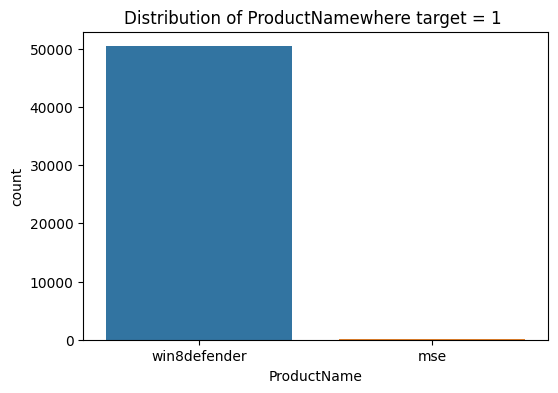

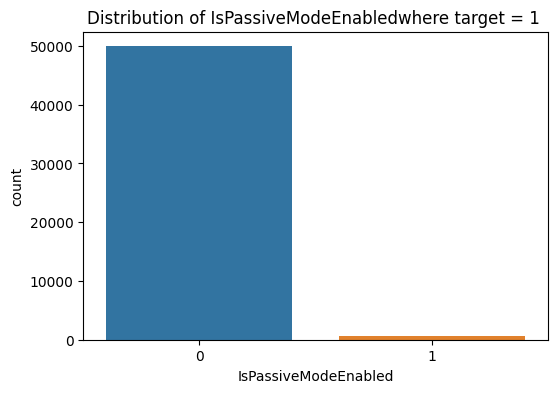

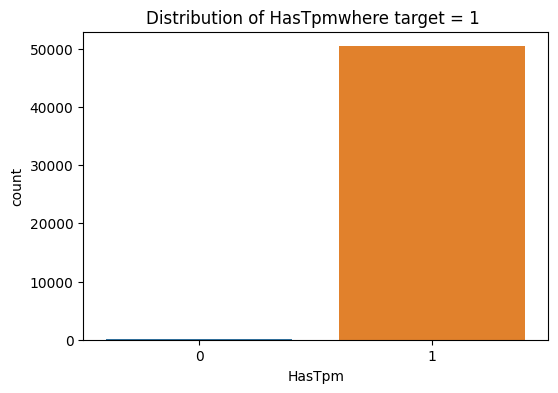

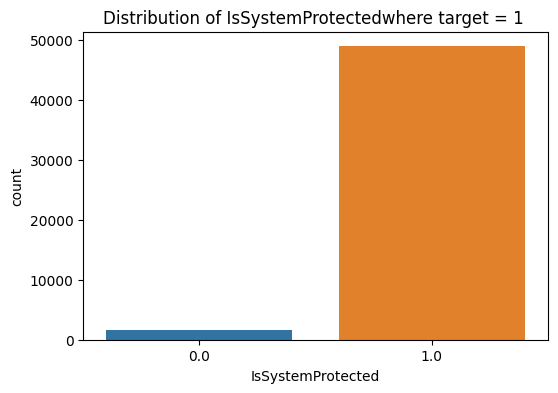

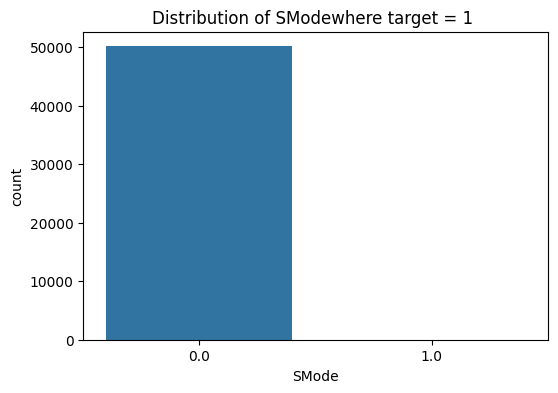

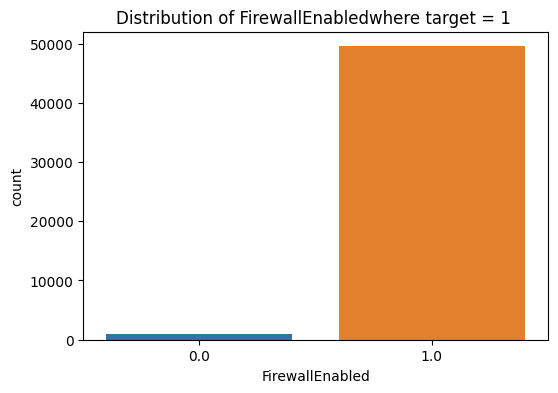

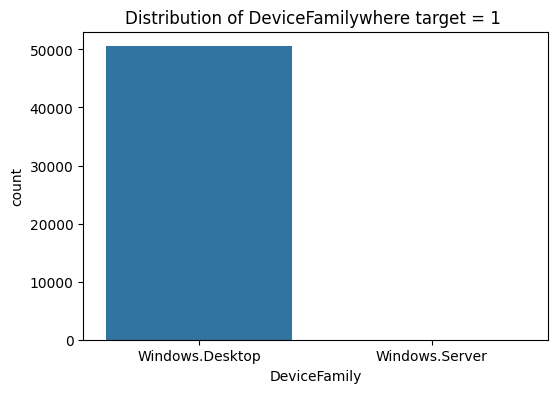

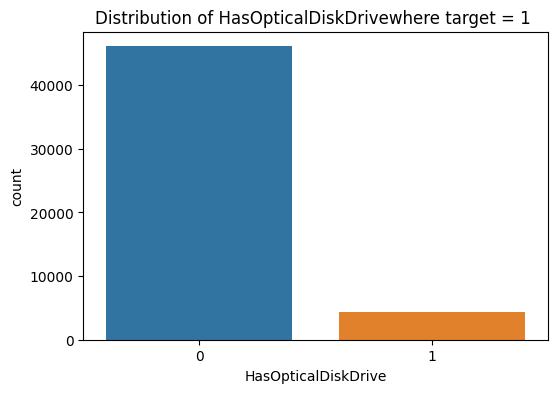

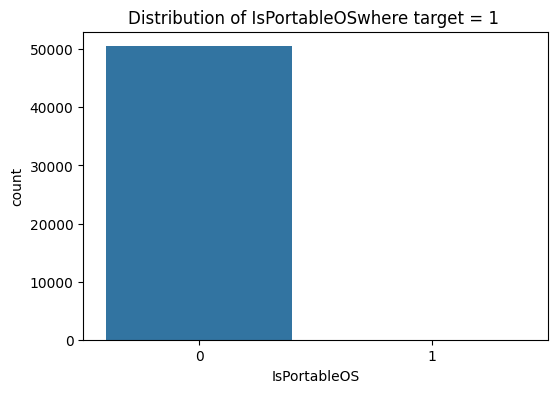

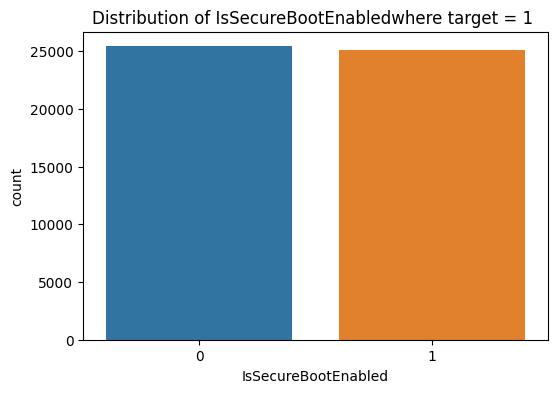

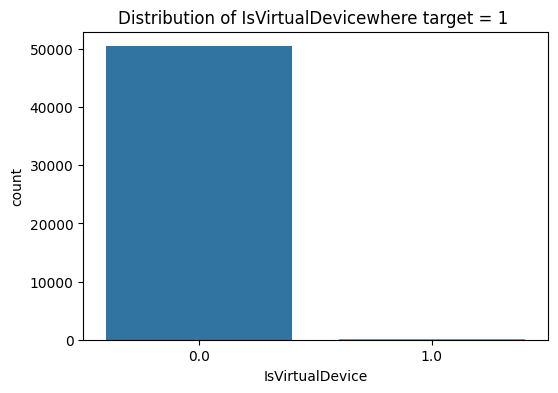

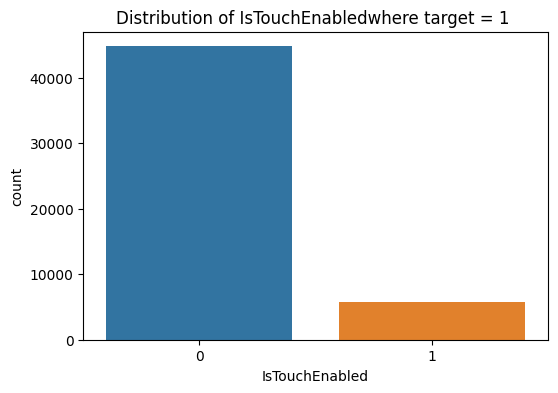

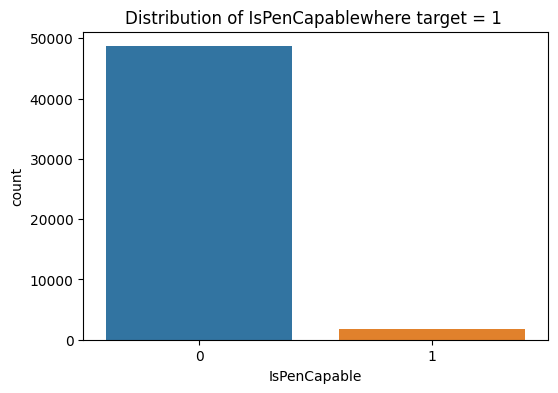

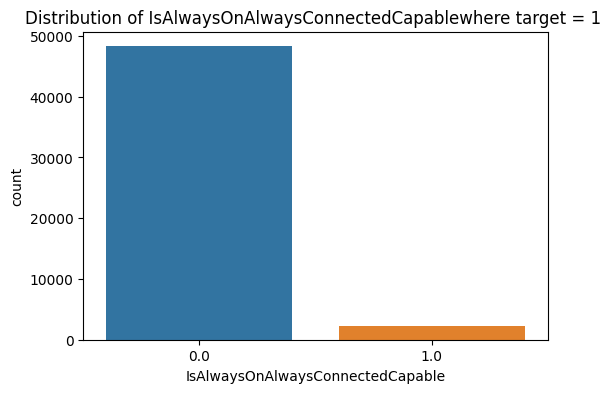

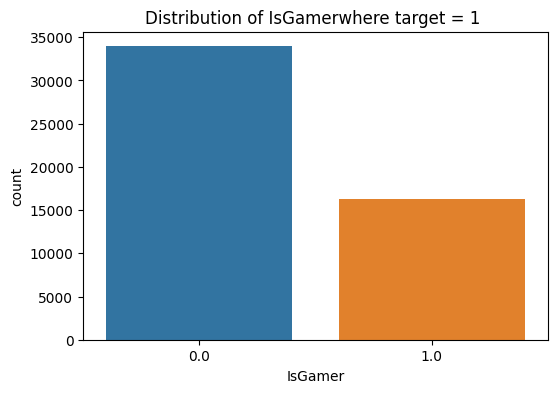

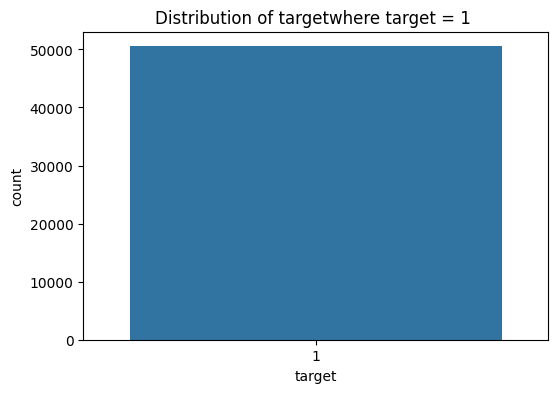

In [5]:
#Distribution of Binary Features for target = 1
binary_features = [col for col in df_train.columns if df_train[col].nunique() == 2]
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df_target_1)
    plt.title(f'Distribution of {feature}where target = 1 ')
    plt.show()


### Insights
##### * The dataset could possibly capture by windows Protection as entire dataset seen to be Windows Enviromnet 
##### * It contain numerical, categorical, binary, few labled in numerical but categorcial nature
##### * The features contain information on the Machine attributes & details, OS Congiguration details, Device location & settings, Protection detials
##### * Most of the binary Features are obsorbed in numerical_features, has to be treated
##### * The Feature with highest Missing values is Smode 0.98 % 
##### * The Dataset has 165 duplicate rows which has to be removed 
##### * Some Features such as Machine ID(unique no.), Chassis Type, LocalEnglishnameID, OSSKU FriendlyName seems to be not contributing towards the Predetiveness 
##### * Target has distribution of 0.505 which is almost unbaised 
##### * Almost 50% of the infected systems from the training data are from the RegionIdentifier 10.0, 11.0, & 1.0
##### * 50% of the infected systems from the training data LicenseActivationChannel is Retail 


## Preprocessing
#### Data Cleaning
##### Dupicate Rows & Non contributing features are to be dropped

In [6]:
#Drop non Contributing Features & Duplicate Rows
df_train2 = df_train.drop(['MachineID', 'IsBetaUser', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'ChassisType', 'AutoSampleSubmissionEnabled','PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'OSSkuFriendlyName',  'DateAS'], axis=1)
df_train2 = df_train2.drop_duplicates()

#Split Traget and store at a new variable
yom = df_train2['target']
df_train2 = df_train2.drop('target', axis=1)
df_train2.shape

(99833, 62)

### Feature Understanding
##### Spliting Numerical Feautres based on datatype, categorical bsed on datatype binary with features has only 2 unique values   

In [7]:
numerical_features = df_train2.select_dtypes(include=np.number).columns.tolist()
categorical_features = df_train2.select_dtypes(include='object').columns.tolist()
binary_features = [col for col in df_train2.columns if df_train2[col].nunique() == 2]

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)
print("Binary features:", binary_features)


Numerical features: ['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier']
Categorical features: ['ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName'

##### Few float type features listed in numerical are to be treated with categorical  
##### Diskspace columns are scaled with MinMax

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Few Numerical features are converted to categorical and encode

numerical_to_categorical = [col for col in numerical_features if col not in ['PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB']]

# LabelEncoder for convering categorical
for col in numerical_to_categorical:
    le = LabelEncoder()
    df_train2[col] = le.fit_transform(df_train2[col])

# Scale with MinMaxScaler to DiskSpace Features 
scaler = MinMaxScaler()
numerical_to_scale = ['PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB']
df_train2[numerical_to_scale] = scaler.fit_transform(df_train2[numerical_to_scale])


In [9]:
# binary_features.info
binary_features

['ProductName',
 'IsPassiveModeEnabled',
 'HasTpm',
 'IsSystemProtected',
 'SMode',
 'FirewallEnabled',
 'DeviceFamily',
 'HasOpticalDiskDrive',
 'IsPortableOS',
 'IsSecureBootEnabled',
 'IsVirtualDevice',
 'IsTouchEnabled',
 'IsPenCapable',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsGamer']

##### Some of Binary features are in the numerical, as they have some other values aswell or NA, this identifted based on the column name, selectivly those could be moved to binary and treat the NAs or 3rd value to be 0 

In [10]:
numerical_features_to_convert = ['RealTimeProtectionState','IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected',
                                 'SMode', 'FirewallEnabled', 'EnableLUA', 'IsPortableOS',
                                 'IsFlightsDisabled', 'IsVirtualDevice', 'IsTouchEnabled','HasOpticalDiskDrive', 
                                 'IsPenCapable', 'IsSecureBootEnabled', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',]

binary_features = []

for col in numerical_features_to_convert:
    # Impute missing values (NaN or blank) with 0
    df_train2[col] = df_train2[col].fillna(0)

    # Convert to binary (0 or 1), imputing non-binary values with 0
    df_train2[col] = df_train2[col].apply(lambda x: 1 if x == 1 else (0 if x == 0 else 0))

    binary_features.append(col)

# Drop the converted columns from numerical_features
numerical_features = [col for col in numerical_features if col not in numerical_features_to_convert]

print("Updated Numerical features:", numerical_features)
print("Binary features:", binary_features)


Updated Numerical features: ['AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'OSBuildNumber', 'OSProductSuite', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'FirmwareManufacturerID', 'FirmwareVersionID', 'RegionIdentifier']
Binary features: ['RealTimeProtectionState', 'IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'EnableLUA', 'IsPortableOS', 'IsFlightsDisabled', 'IsVirtualDevice', 'IsTouchEnabled', 'HasOpticalDiskDrive', 'IsPenCapable', 'IsSecureBootEnabled', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']


In [11]:
df_train2[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 99833 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AntivirusConfigID               99833 non-null  int64  
 1   NumAntivirusProductsInstalled   99833 non-null  int64  
 2   NumAntivirusProductsEnabled     99833 non-null  int64  
 3   OSBuildNumber                   99833 non-null  int64  
 4   OSProductSuite                  99833 non-null  int64  
 5   IEVersionID                     99833 non-null  int64  
 6   OEMNameID                       99833 non-null  int64  
 7   OEMModelID                      99833 non-null  int64  
 8   ProcessorCoreCount              99833 non-null  int64  
 9   ProcessorManufacturerID         99833 non-null  int64  
 10  ProcessorModelID                99833 non-null  int64  
 11  PrimaryDiskCapacityMB           99723 non-null  float64
 12  SystemVolumeCapacityMB          99723

In [12]:
df_train2[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 99833 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ProductName               99833 non-null  object
 1   EngineVersion             99833 non-null  object
 2   AppVersion                99833 non-null  object
 3   SignatureVersion          99833 non-null  object
 4   PlatformType              99833 non-null  object
 5   Processor                 99833 non-null  object
 6   OSVersion                 99833 non-null  object
 7   OsPlatformSubRelease      99833 non-null  object
 8   OSBuildLab                99833 non-null  object
 9   SKUEditionName            99833 non-null  object
 10  MDC2FormFactor            99833 non-null  object
 11  DeviceFamily              99833 non-null  object
 12  PrimaryDiskType           99810 non-null  object
 13  PowerPlatformRole         99833 non-null  object
 14  NumericOSVersion          9

In [13]:
df_train2[binary_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 99833 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   RealTimeProtectionState           99833 non-null  int64
 1   IsPassiveModeEnabled              99833 non-null  int64
 2   HasTpm                            99833 non-null  int64
 3   IsSystemProtected                 99833 non-null  int64
 4   SMode                             99833 non-null  int64
 5   FirewallEnabled                   99833 non-null  int64
 6   EnableLUA                         99833 non-null  int64
 7   IsPortableOS                      99833 non-null  int64
 8   IsFlightsDisabled                 99833 non-null  int64
 9   IsVirtualDevice                   99833 non-null  int64
 10  IsTouchEnabled                    99833 non-null  int64
 11  HasOpticalDiskDrive               99833 non-null  int64
 12  IsPenCapable                      998

## Pipeline

##### For Numerical imputing the NAs with Median Strategy & scaling with StandardScalar
##### Foor Categorical Imputing with Mode, Encoding with OneHotEncode
#####  Binary has treated already 

In [14]:
# Create numerical pipeline - Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create categorical pipeline - Imputation + Encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create binary pipeline
binary_transformer = 'passthrough'


In [15]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ])


In [16]:
 #Fit and transform the data
df_train2_processed = preprocessor.fit_transform(df_train2)

# # tryied verifying is there anymore NaN values in dataframe
# # from sprse matrxi transformed back to dataframe
# feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
# numerical_names = numerical_features
# binary_names = binary_features

# all_feature_names = numerical_names + feature_names + binary_names

# df_processed = pd.DataFrame(df_train2_processed.toarray(), columns = all_feature_names)

# print(df_processed.isna().sum().sum()) # Prints the total number of NaNs across the entire DataFrame

### Train Validation Split

In [17]:
from sklearn.model_selection import train_test_split

# Training & Validation Split

X = df_train2_processed
y = yom


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42) 


## Model - Random Forest
##### Obtained Accuracy of 0.612 with HT

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42) 
rf_classifier.fit(X_train, y_train)

#predictions on validation set
y_pred = rf_classifier.predict(X_val)

#Model accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy}")

Accuracy of the Random Forest Classifier: 0.6055491561075775


### Logistic Regression 
##### Obtained Accuracy of 0.601

In [19]:
# # Logistic Regression model with 'newton-cg' solver
# from sklearn.linear_model import LogisticRegression
# logreg_model = LogisticRegression(solver='newton-cg', max_iter=1000) # Increased max_iter
# logreg_model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = logreg_model.predict(X_val)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print(f"Accuracy of Logistic Regression model: {accuracy}")


### Decision Tree
##### Obtained Accuracy of 0.578 with HT

In [20]:
# from sklearn.tree import DecisionTreeClassifier
# dt_classifier = DecisionTreeClassifier(random_state=42, splitter='random') # Use 'random' splitter
# dt_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = dt_classifier.predict(X_val)

# # Evaluate the model's accuracy
# accuracy_dt = accuracy_score(y_val, y_pred)
# print(f"Accuracy of the Decision Tree Classifier (random split): {accuracy_dt}")

## Hyperparameter Tuneing 

In [21]:
def model_hpt(**parameter):
    tune_model = RandomForestClassifier(n_jobs = -1, random_state=42, **parameter).fit(X_train, y_train)
    tune_train_score = tune_model.score(X_train, y_train)
    tune_val_score = tune_model.score(X_val, y_val)
    tune_model_score = tune_train_score, tune_val_score
    return tune_model_score

# Example usage
model_hpt(max_depth=20, min_samples_split=10)

(0.6830816617834874, 0.6127109731056243)

## Test Set
#### Preprocessing 
#### Model Deployment  

In [22]:
df_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
print("File 'test.csv' loaded")


File 'test.csv' loaded


In [23]:
# Following Same PreProcessing for Test set
import pandas as pd
import numpy as np
def process_and_predict(df):

  #Droping
  df2 = df.drop(['MachineID', 'IsBetaUser', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'ChassisType', 'AutoSampleSubmissionEnabled','PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'OSSkuFriendlyName',  'DateAS'], axis=1)
  df2 = df2.drop_duplicates()

  numerical_features = df2.select_dtypes(include=np.number).columns.tolist()
  categorical_features = df2.select_dtypes(include='object').columns.tolist()

  numerical_to_categorical = [col for col in numerical_features if col not in ['PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB']]

  for col in numerical_to_categorical:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])

  scaler = MinMaxScaler()
  numerical_to_scale = ['PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB']
  df2[numerical_to_scale] = scaler.fit_transform(df2[numerical_to_scale])

  numerical_features_to_convert = ['RealTimeProtectionState','IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected',
                                 'SMode', 'FirewallEnabled', 'EnableLUA', 'IsPortableOS',
                                 'IsFlightsDisabled', 'IsVirtualDevice', 'IsTouchEnabled','HasOpticalDiskDrive', 
                                 'IsPenCapable', 'IsSecureBootEnabled', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',]

  for col in numerical_features_to_convert:
    df2[col] = df2[col].fillna(0)
    df2[col] = df2[col].apply(lambda x: 1 if x == 1 else (0 if x == 0 else 0))

  numerical_features = [col for col in numerical_features if col not in numerical_features_to_convert]

#same preprocessor from training
  df_train2_processed = preprocessor.transform(df2)

#Prediction
  predictions = rf_classifier.predict(df_train2_processed)
  return predictions

#function for df_test
predictions = process_and_predict(df_test)
predictions


array([1, 0, 0, ..., 0, 0, 0])

## Submission File 

In [24]:
# Export to csv
# Convert predictions to a DataFrame with 'id' and 'target' columns

# Get the length of predictions
num_predictions = len(predictions)

# Create 'id' column with the correct length
submission = pd.DataFrame({"id": range(0, num_predictions), "target": predictions})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

# Read the CSV file
temp_target = pd.read_csv("submission.csv")
print(temp_target)

        id  target
0        0       1
1        1       0
2        2       0
3        3       0
4        4       0
...    ...     ...
9993  9993       0
9994  9994       1
9995  9995       0
9996  9996       0
9997  9997       0

[9998 rows x 2 columns]


## Conclusion 
##### For this Machine Learing Practice Project The Given task - System Threat Forecaster Dataset has explored, Dropped of removable features and duplication rows, followed the Data Exploratry Analysis, Handling Mising Values, Encoding and treated essential PreProcessing. Choosen to Compile with three Diffrent Models and choose the better. 

##### 1. Random Forest - Model is high among the three gave the  accuracy of 0.601 and after Hypertuning Resulted **0.612**  
##### 2. Decesion Tree - Model is low among the three gave the  accuracy of 0.56 and after Hypertuning Resulted 0.58   
##### 3. Logistic Regression - Model choosen with solver 'newton-cg' gave the  accuracy of 0.601  

#### I am Happy to conclude that all these three Models presented have crossed the cutoff accuracy of 0.55 

In [25]:
# import os
# os.remove("/kaggle/working/submission.csv")